In [1]:
#!pip install qiskit --upgrade
!pip install qiskit[visualization] --quiet

In [3]:
import math
import qiskit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from qiskit_aer.backends import AerSimulator
from qiskit.quantum_info import Statevector, random_statevector, Pauli, SparsePauliOp
from qiskit.visualization import plot_bloch_multivector
from qiskit.primitives import Estimator


# Exercise 3

In [4]:
def teleport(StateVector):

    circ_q = qiskit.QuantumRegister(3, name='q')
    circ_c = qiskit.ClassicalRegister(1, name='c')
    circ = qiskit.QuantumCircuit(circ_q, circ_c)
    circ.initialize(StateVector, circ_q[0])
    
    circ.h(circ_q[2])
    circ.cx(circ_q[2], circ_q[1])
    
    circ.barrier()
    circ.cx(circ_q[0], circ_q[1])
    circ.h(circ_q[0])
    
    circ.barrier()
    circ.measure(circ_q[1], circ_c)
    circ.x(circ_q[2]).c_if(circ_c, 1)
    
    circ.measure(circ_q[0], circ_c)
    circ.z(circ_q[2]).c_if(circ_c, 1)
    
    return circ

In [5]:
# Test it by teleporting a random statevector random_statevector()
# Simulate the circuit using run()
# plot_bloch_multivector()

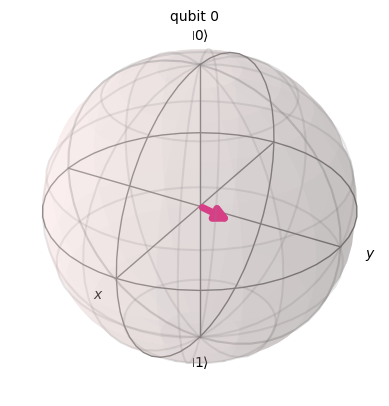

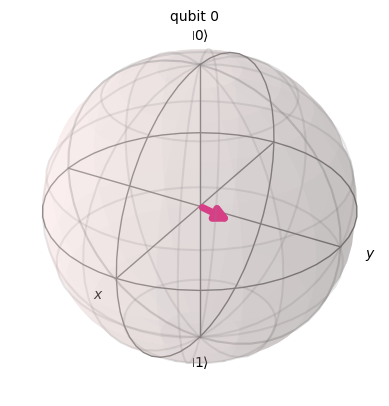

In [6]:
rand = random_statevector(2)
plot_bloch_multivector(rand)

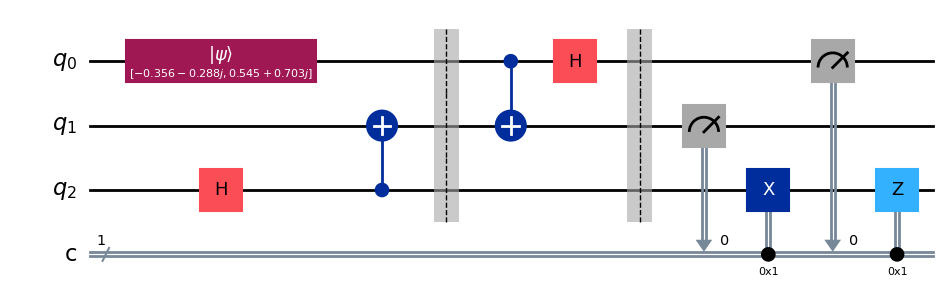

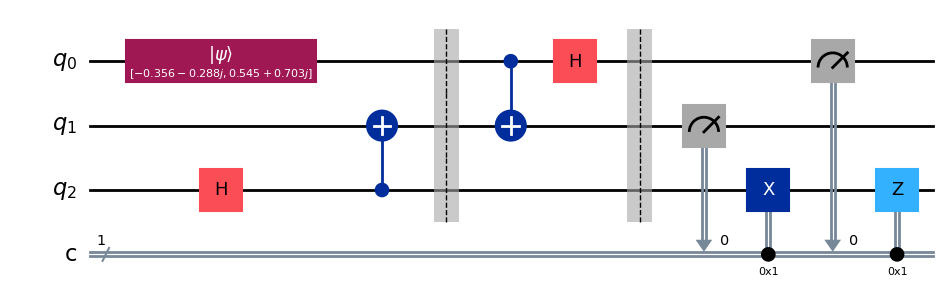

In [7]:
teleported_circuit = teleport(rand)

teleported_circuit.draw('mpl')

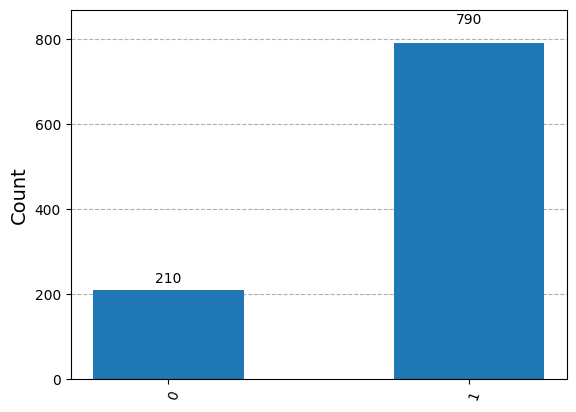

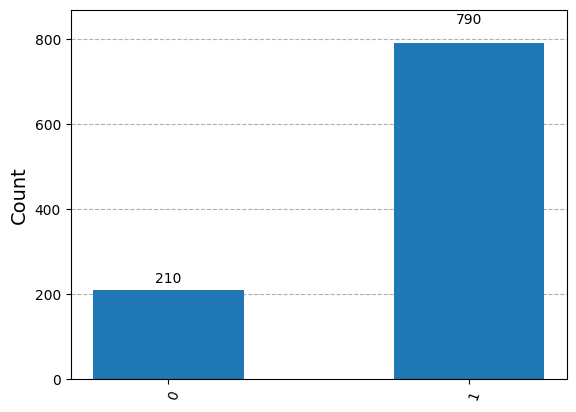

In [8]:
sim = AerSimulator(method="statevector")

N_shots = 1000  # number of measurements

teleported_circuit.save_statevector()  # save statevector at the end of the circuit
teleported_state = sim.run(teleported_circuit).result().get_statevector()

teleported_circuit.measure(2, 0)

result = sim.run(teleported_circuit, shots=N_shots).result()
counts = result.get_counts(teleported_circuit)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

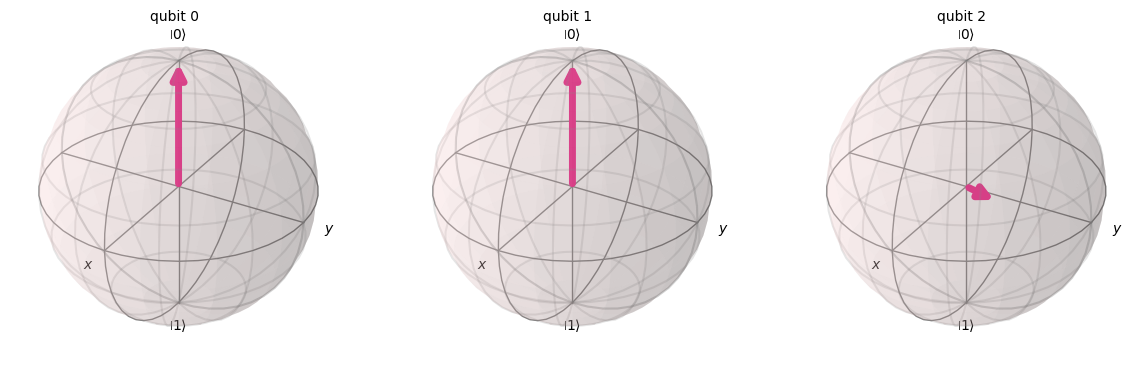

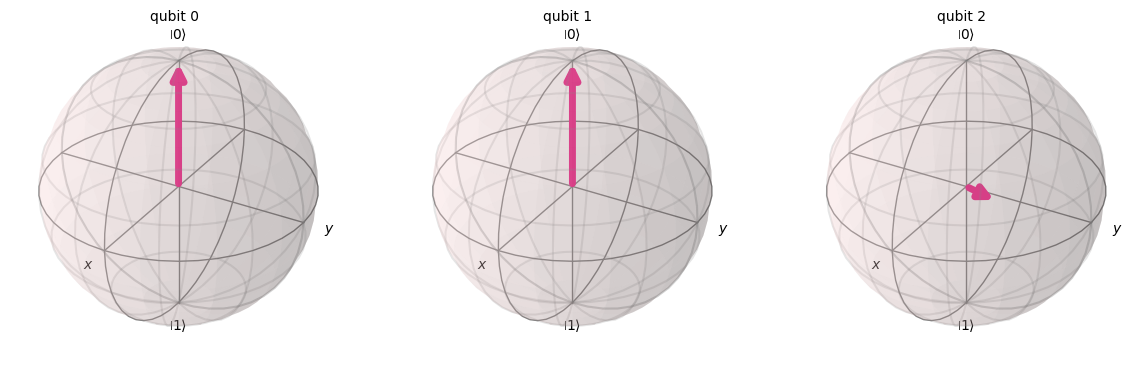

In [9]:
plot_bloch_multivector(teleported_state)

# Exercise 11

In [10]:
def parametrized_circuit(a, b):

    circ_q = qiskit.QuantumRegister(2, name='q')
    circ = qiskit.QuantumCircuit(circ_q)

    circ.h(1)
    circ.rzz(b, circ_q[0], circ_q[1])
    circ.h(1)
    
    circ.barrier()
    circ.h(0)
    circ.rzz(b, circ_q[0], circ_q[1])
    circ.h(0)
    
    circ.barrier()
    circ.rz(a, circ_q[1])
    circ.rz(a, circ_q[0])
 
    return circ

# Exercise 12

In [11]:
pauli_x = Pauli('X')
pauli_y = Pauli('Y')
pauli_z = Pauli('Z')

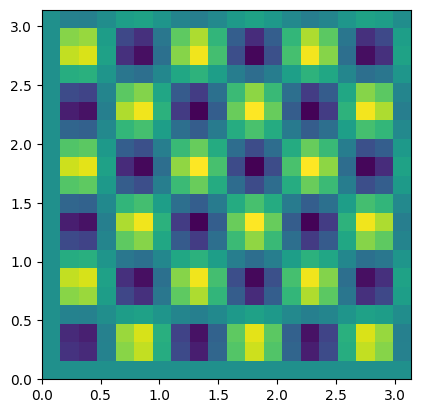

In [13]:
estimator = Estimator()

datapoints = []
h = -SparsePauliOp(pauli_x.tensor(pauli_z)) - SparsePauliOp(pauli_z.tensor(pauli_x))
a_list = np.linspace(0, math.pi, 20)
b_list = np.linspace(0, math.pi, 20)

for a in range(len(a_list)):
    datapoints.append([])
    for b in range(len(b_list)):
        circ = parametrized_circuit(a, b) #### CHECK THE WAY I POPULATE THIS VECTOR !!!
        expectation = estimator.run(circ, h).result().values[0]
        datapoints[a].append(expectation)


plt.imshow(datapoints, origin='lower', extent=[0, math.pi, 0, math.pi])
plt.show()

#print(datapoints)


##### DOUBLE-CHECK - THIS LOOKS WRONG !!!